<a href="https://colab.research.google.com/github/SolAtomizer/Portfolio/blob/main/StellarClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stellar Classification
### Classifying Galaxies, Stars and Quasars based on Spectral Characteristics
Author: https://github.com/SolAtomizer

## Initiating Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17
df = pd.read_csv('star_classification.csv')

### Initial Exploration and Cleaning

In [3]:
#Small overview of the dataset's contents.
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [4]:
#Verifying numerical values.
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [5]:
#An observation in the dataset has a value of -9999 for variables "u", "g" and "z"
outlier = df[df['u']==-9999.000].index
#The lone outlier gets dropped from the dataframe
df.drop(outlier,inplace = True)

In [6]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,9.999900e+04,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.0,99999.000000,99999.000000,9.999900e+04,99999.000000,99999.000000,99999.000000,99999.000000
mean,1.237665e+18,177.628653,24.135552,22.080679,20.631583,19.645777,19.084865,18.768988,4481.403354,301.0,3.511625,186.127011,5.783903e+18,0.576667,5137.027890,55588.653687,449.315613
std,8.438450e+12,96.502612,19.644608,2.251068,2.037384,1.854763,1.757900,1.765982,1964.739021,0.0,1.586913,149.007687,3.324026e+18,0.730709,2952.312485,1808.492217,272.498252
min,1.237646e+18,0.005528,-18.785328,10.996230,10.498200,9.822070,9.469903,9.612333,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.517698,5.147477,20.352410,18.965240,18.135795,17.732280,17.460830,3187.000000,301.0,2.000000,82.000000,2.844137e+18,0.054522,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900527,23.646462,22.179140,21.099930,20.125310,19.405150,19.004600,4188.000000,301.0,4.000000,146.000000,5.614896e+18,0.424176,4987.000000,55869.000000,433.000000
75%,1.237668e+18,233.895005,39.901582,23.687480,22.123775,21.044790,20.396510,19.921120,5326.000000,301.0,5.000000,241.000000,8.332365e+18,0.704172,7400.500000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [7]:
df.isna().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

### Pre-processing Data for Classification

In [8]:
#Dropping columns related to IDs or photographic metadata. 
DroppedCols = ['obj_ID','run_ID','rerun_ID','cam_col','field_ID','spec_obj_ID','class','plate','MJD','fiber_ID']

#Features
X = df.drop(DroppedCols, axis = 1)
#Label
y = df['class']

In [10]:
#Ultraviolet, green and infrared filters have an extremely high correlation
corr = X.corr()
corr.style.background_gradient(cmap='coolwarm')

,alpha,delta,u,g,r,i,z,redshift
alpha,1.000000,0.138698,-0.000222,-0.014118,-0.022079,-0.023577,-0.025160,0.001671
delta,0.138698,1.000000,-0.026845,-0.007077,-0.006845,-0.004488,-0.006286,0.031629
u,-0.000222,-0.026845,1.000000,0.853350,0.728681,0.618346,0.545760,0.166816
g,-0.014118,-0.007077,0.853350,1.000000,0.932996,0.847046,0.775302,0.318910
r,-0.022079,-0.006845,0.728681,0.932996,1.000000,0.962868,0.919114,0.433237
i,-0.023577,-0.004488,0.618346,0.847046,0.962868,1.000000,0.971546,0.492381
z,-0.025160,-0.006286,0.545760,0.775302,0.919114,0.971546,1.000000,0.501060
redshift,0.001671,0.031629,0.166816,0.318910,0.433237,0.492381,0.501060,1.000000


In [11]:
#The stellar objects in the dataset are unevenly distributed.
y.value_counts()

GALAXY    59445
STAR      21593
QSO       18961
Name: class, dtype: int64

In [12]:
#Splitting the data into a training and test set. 
#Stratifying y due to class imbalance helps performance.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify = y)

### Visualizing Features 

In [13]:
#General esthetic options
custom_params = {"axes.spines.right": False, "axes.spines.top": False, 'axes.grid': True}
sns.set_theme(style="ticks", rc=custom_params, palette ='tab10')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The `squeeze` parameter is deprecated and will be removed in a future version.
  


class
GALAXY    177.954727
QSO       180.474314
STAR      174.232180
Name: alpha, dtype: float64


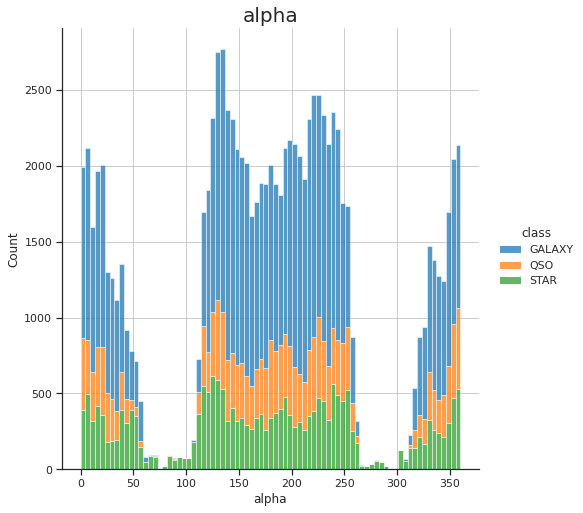

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The `squeeze` parameter is deprecated and will be removed in a future version.
  


class
GALAXY    23.513911
QSO       26.808621
STAR      23.499671
Name: delta, dtype: float64


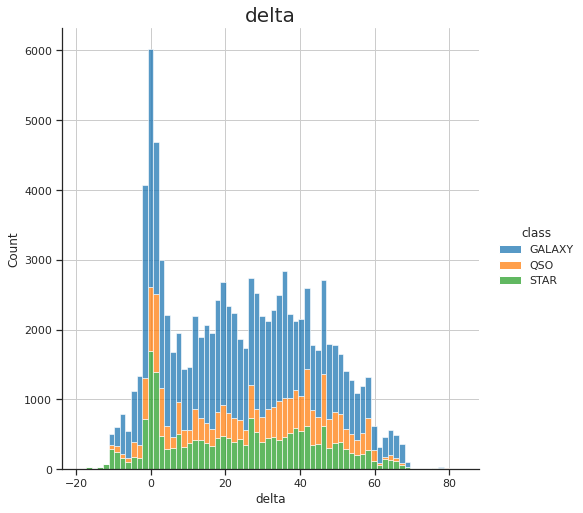

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The `squeeze` parameter is deprecated and will be removed in a future version.
  


class
GALAXY    22.587379
QSO       21.547619
STAR      21.153830
Name: u, dtype: float64


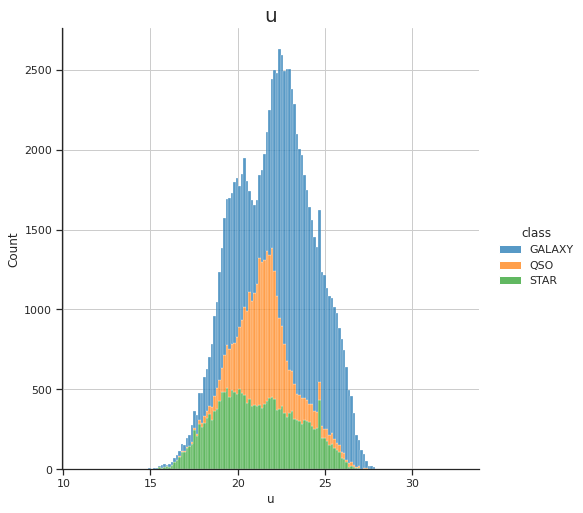

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The `squeeze` parameter is deprecated and will be removed in a future version.
  


class
GALAXY    20.906101
QSO       20.926193
STAR      19.617142
Name: g, dtype: float64


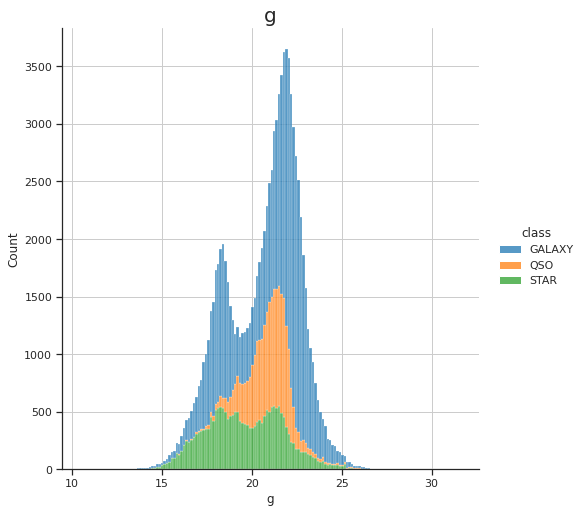

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The `squeeze` parameter is deprecated and will be removed in a future version.
  


class
GALAXY    19.587552
QSO       20.624089
STAR      18.947005
Name: r, dtype: float64


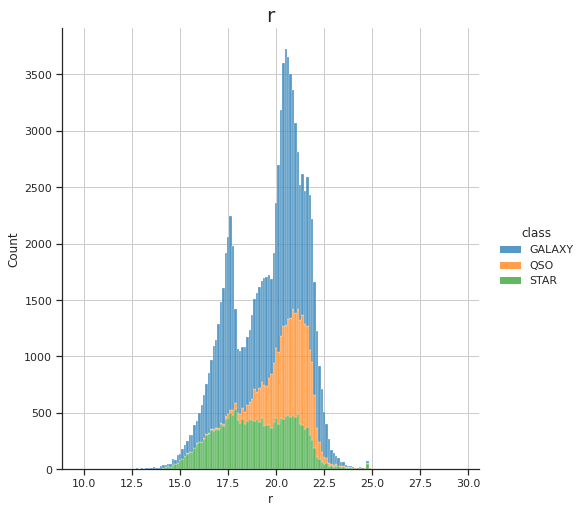

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The `squeeze` parameter is deprecated and will be removed in a future version.
  


class
GALAXY    18.851990
QSO       20.431173
STAR      18.543760
Name: i, dtype: float64


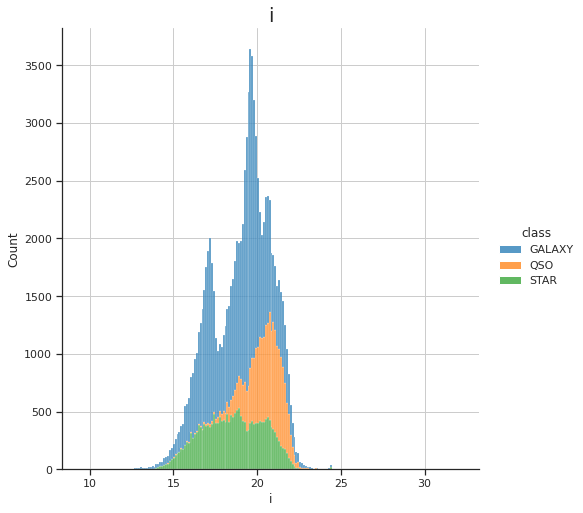

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The `squeeze` parameter is deprecated and will be removed in a future version.
  


class
GALAXY    18.449156
QSO       20.266732
STAR      18.334295
Name: z, dtype: float64


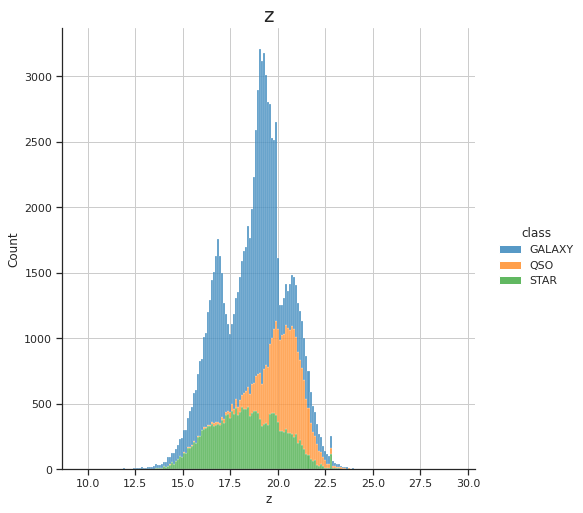

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The `squeeze` parameter is deprecated and will be removed in a future version.
  


class
GALAXY    0.421596
QSO       1.719676
STAR     -0.000115
Name: redshift, dtype: float64


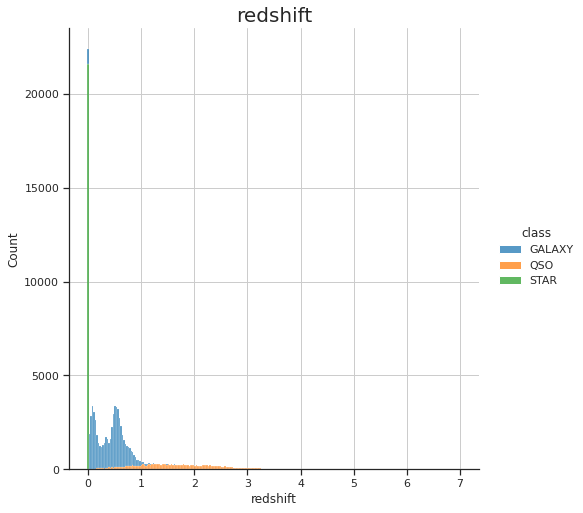

In [14]:
#The three seem to be distributed relatively similarily in most features.
#However, the redshift feature is drastically different depending on the class. It should greatly help to differenciate galaxies, quasars and stars. 
for col in list(X):
 print(df.groupby('class', squeeze = True)[col].mean())
 sns.displot(data=df, x=col, hue='class', multiple = 'stack', kind = 'hist', height=7)
 plt.title(col,fontsize=20)
 plt.show()

### Visualizing Target


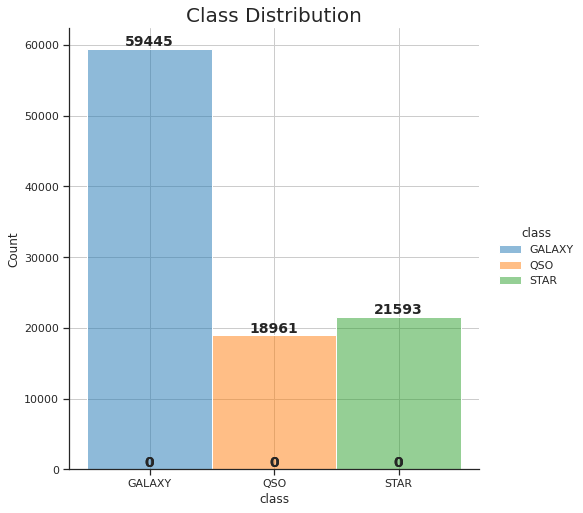

In [15]:
#Visual representation of the class imbalance in the dataset.
g = sns.displot(data=df, x='class', hue='class',height=7)
plt.title('Class Distribution',fontsize=20)

for x, bar in enumerate(g.ax.patches):
    txt_x = bar.get_x()+0.5                      
    txt_y = bar.get_height()
    g.ax.text(txt_x, txt_y+1000,txt_y,ha='center',va='center',size=14,fontweight='bold')

## Classifying data - Decision tree

### Creating Model

In [16]:
#Decision tree has high performance while being easily interpretable.
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

### Interpreting Model

In [17]:
#As noticed during EDA, redshift seems to differenciate the classes the most. Decision tree considers it the most important feature for its classification by far.
for importance, name in sorted(zip(dt.feature_importances_, X_train.columns),reverse=True):
    print(f'Feature: {name:<8} -----> Score: {importance:5f}%')

Feature: redshift -----> Score: 0.876915%
Feature: g        -----> Score: 0.052945%
Feature: u        -----> Score: 0.020242%
Feature: i        -----> Score: 0.013260%
Feature: z        -----> Score: 0.011468%
Feature: r        -----> Score: 0.009560%
Feature: alpha    -----> Score: 0.008883%
Feature: delta    -----> Score: 0.006725%


In [18]:
#Verifying the size of the decision tree.
leaves = dt.get_n_leaves()
depth = dt.get_depth()
print(f'Decision tree has {leaves} leaves and a depth of {depth}.')

Decision tree has 1926 leaves and a depth of 31.


In [19]:
#Printing first 1000 characters of the rules only for brevity.
classification_rules = export_text(dt, feature_names=list(X_train.columns))
print(classification_rules[0:1000])

|--- redshift <= 0.00
|   |--- redshift <= -0.00
|   |   |--- redshift <= -0.00
|   |   |   |--- class: GALAXY
|   |   |--- redshift >  -0.00
|   |   |   |--- i <= 22.21
|   |   |   |   |--- g <= 27.34
|   |   |   |   |   |--- z <= 21.72
|   |   |   |   |   |   |--- u <= 22.43
|   |   |   |   |   |   |   |--- redshift <= -0.00
|   |   |   |   |   |   |   |   |--- alpha <= 113.38
|   |   |   |   |   |   |   |   |   |--- alpha <= 113.35
|   |   |   |   |   |   |   |   |   |   |--- u <= 19.41
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- u >  19.41
|   |   |   |   |   |   |   |   |   |   |   |--- class: STAR
|   |   |   |   |   |   |   |   |   |--- alpha >  113.35
|   |   |   |   |   |   |   |   |   |   |--- class: GALAXY
|   |   |   |   |   |   |   |   |--- alpha >  113.38
|   |   |   |   |   |   |   |   |   |--- alpha <= 317.32
|   |   |   |   |   |   |   |   |   |   |--- class: STAR
|   |   |   |   |   |   |   

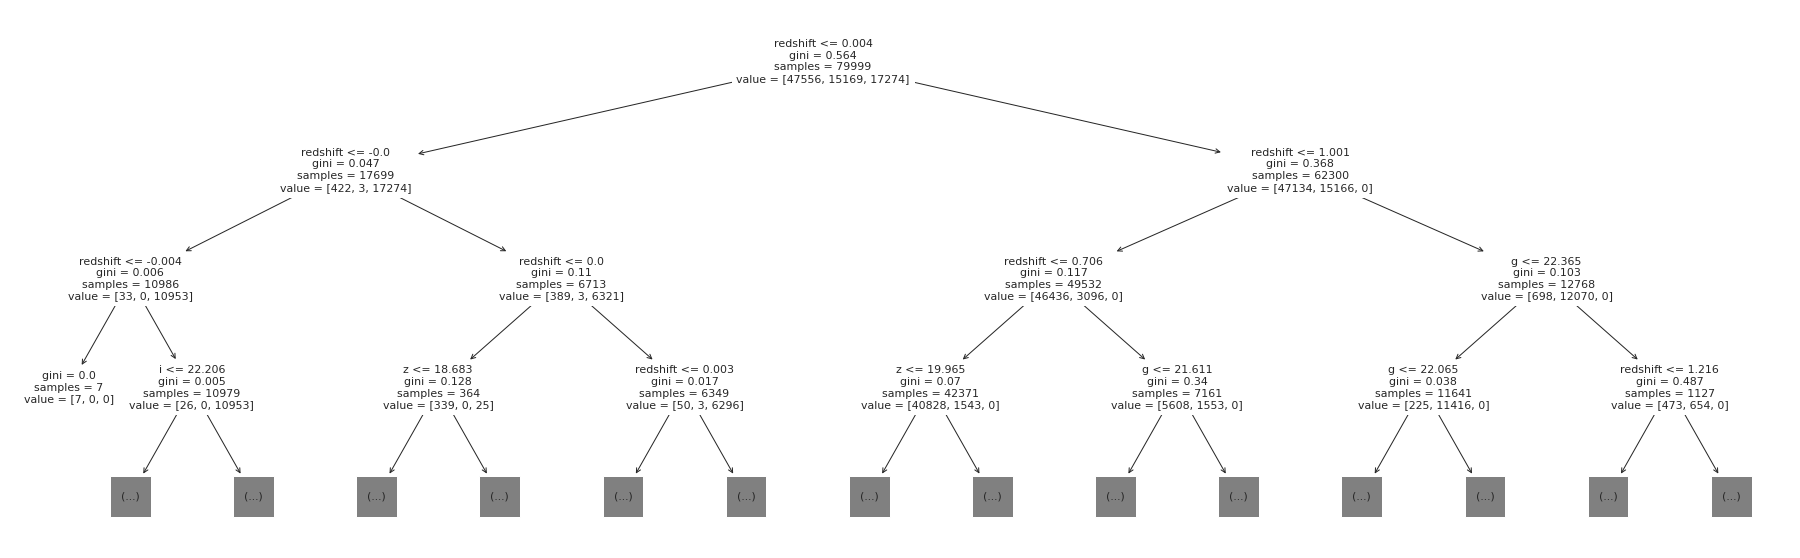

In [20]:
#Plotting the first 3 levels for brevity.
plt.figure(figsize=(32,10))
plot_tree(dt,max_depth = 3, fontsize = 11, feature_names=list(X_train.columns))
plt.show()

### Evaluating Model

In [21]:
#A simple decision tree performs great on this dataset, presumably due to the redshift feature.
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

predictions = dt.predict(X_test)

acc = accuracy_score(y_test,predictions)
f1_weighted = f1_score(y_test,predictions, average = 'weighted')


print(classification_report(y_test,predictions, digits = 4))

              precision    recall  f1-score   support

      GALAXY     0.9704    0.9698    0.9701     11889
         QSO     0.9102    0.9111    0.9106      3792
        STAR     0.9958    0.9965    0.9962      4319

    accuracy                         0.9645     20000
   macro avg     0.9588    0.9592    0.9590     20000
weighted avg     0.9645    0.9645    0.9645     20000



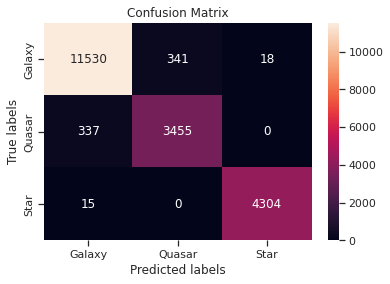

In [22]:
#Creating a confusion matrix to visualize classification results.
cm = confusion_matrix(y_test,predictions)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Galaxy', 'Quasar','Star']); ax.yaxis.set_ticklabels(['Galaxy', 'Quasar','Star']);

## Classifying data - Light Gradient Boosting

### Creating Model

In [23]:
#To verify if performance can be improved versus a decision tree, a Light Gradient Boosting model is created.
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state= 42)
lgbm.fit(X_train,y_train)

LGBMClassifier(random_state=42)

### Interpreting Model

In [24]:
#Redshift is still the most important feature. However, it is notable that other features are considered differently.
for LGBMimportance, LGBMname in sorted(zip(lgbm.feature_importances_, X_train.columns),reverse=True):
    print(f'Feature: {LGBMname:<8} -----> Score: {LGBMimportance}')

Feature: redshift -----> Score: 2213
Feature: g        -----> Score: 1201
Feature: u        -----> Score: 1141
Feature: alpha    -----> Score: 958
Feature: i        -----> Score: 949
Feature: z        -----> Score: 934
Feature: delta    -----> Score: 920
Feature: r        -----> Score: 684


### Evaluating Model

In [29]:
#Unsurprisingly, LGBM Model performs slightly better than the decision tree. The f1-score for Quasars is improved by roughly 3%.
#However, this type of model is unfortunately much harder to interpret, reinforcing the strength of the decision tree.
LGBMpredictions = lgbm.predict(X_test)

LGBMacc = accuracy_score(y_test,LGBMpredictions)
LGBMf1_weighted = f1_score(y_test,LGBMpredictions, average = 'weighted')

print(classification_report(y_test,LGBMpredictions, digits = 4))

              precision    recall  f1-score   support

      GALAXY     0.9769    0.9839    0.9804     11889
         QSO     0.9532    0.9299    0.9414      3792
        STAR     0.9954    0.9975    0.9964      4319

    accuracy                         0.9766     20000
   macro avg     0.9752    0.9704    0.9727     20000
weighted avg     0.9764    0.9766    0.9765     20000



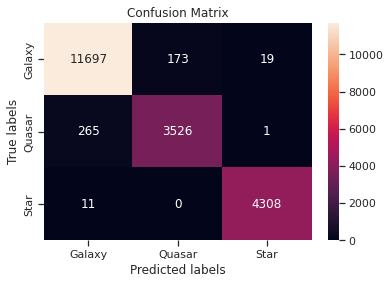

In [26]:
#Creating a confusion matrix for the LGBM model.
#The precision for Quasars has a notable improvement, from 91.02% to 95.32%
LGBMcm = confusion_matrix(y_test,LGBMpredictions)

ax2= plt.subplot()
sns.heatmap(LGBMcm, annot=True, fmt='g', ax=ax2);
ax2.set_xlabel('Predicted labels');
ax2.set_ylabel('True labels'); 
ax2.set_title('Confusion Matrix'); 
ax2.xaxis.set_ticklabels(['Galaxy', 'Quasar','Star']); ax2.yaxis.set_ticklabels(['Galaxy', 'Quasar','Star']);

In [30]:
#Displaying accuracy and F1 for both models to allow for a quick comparison.
print(f"{'Decision Tree performance ---->':<30} Accuracy:{acc:.6f}% - F1_Score:{f1_weighted:.6f}%")
print(f"{'Light GBM performance -------->':<30} Accuracy:{LGBMacc:.6f}% - F1_Score:{LGBMf1_weighted:.6f}%")

Decision Tree performance ----> Accuracy:0.964450% - F1_Score:0.964454%
Light GBM performance --------> Accuracy:0.976550% - F1_Score:0.976456%
